In [1]:
# Import numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Constant interpolation
def constant(X, Y, x0):
    """ Constant Interpolation: find an approximation for f(x0) by constant
        interpolating the known points (X,Y).
        
        args:
        X: ordered vector of known points in x-axis.
        Y: vector of known points in y-axis, where Y[i] = f(X[i]).
        x0: arbitrary point between [X[0], X[-1]]
        
        return:
        approx of f(x0), if x0 is inside [X[0], X[-1]];
        float('nan'), otherwise.
    """
    
    # test whether x0 is inside [X[0], X[-1]].
    if x0 < X[0] or x0 > X[-1]:
        return float('nan')
    
    # binary search idx.
    # idx: least integer such that X[idx] >= x0.
    begin, end = 0, len(X) - 1
    while begin < end:
        middle = (begin + end) // 2
        if x0 < X[middle]:
            end = middle
        else:
            begin = middle + 1
    idx = end 
    
    # return the knonwn point nearest to x0.
    if idx == 0:
        return Y[0]
    elif abs(x0 - X[idx]) > abs(x0 - X[idx - 1]):
        return Y[idx - 1]
    else:
        return Y[idx]

In [3]:
# Linear interpolation
def linear(X, Y, x0):
    """ Linear Interpolation: find an approximation for f(x0) by linear
        interpolating the known points (X,Y).
        
        args:
        X: ordered vector of known points in x-axis.
        Y: vector of known points in y-axis, where Y[i] = f(X[i]).
        x0: arbitrary point between [X[0], X[-1]]
        
        return:
        approx of f(x0), if x0 is inside [X[0], X[-1]];
        float('nan'), otherwise.
    """
    
    # test whether x0 is inside [X[0], X[-1]].
    if x0 < X[0] or x0 > X[-1]:
        return float('nan')
    
    # binary search i.
    # i: least integer such that X[i] >= x0.
    begin, end = 0, len(X) - 1
    while begin < end:
        middle = (begin + end) // 2
        if x0 < X[middle]:
            end = middle
        else:
            begin = middle + 1
    i = end 
    
    # return the approximation of f(x0).
    if i == 0:
        return Y[0]
    else:
        A = (Y[i] - Y[i-1]) / (X[i] - X[i-1])
        B = (Y[i-1]*X[i] - Y[i]*X[i-1]) / (X[i] - X[i-1])
        return A*x0 + B

In [4]:
# Polynomial interpolation
def P(A, x0):
    """ P function: given an array A containing the coefficients of a certain
        polynomial P(x):
            P(x) = A[0] + A[1]*x + A[2]*x**2 + ... + A[N-1]*x**(N-1)
        returns y0 = P(x0).
    """
    y0 = 0
    for i in range(len(A)):
        y0 += A[i] * x0**i
    return y0

def polynomial(X, Y):
    """ Polynomial Interpolation: find the coefficients of the interpolating
        polynomial for the known points (X,Y). This polynomial P(x) is the
        approximation of f(x).
        
        args:
        X: ordered vector of known points in x-axis.
        Y: vector of known points in y-axis, where Y[i] = f(X[i]).
        
        This function returns the coefficients A of the interpolating
        polynomial P(x):
            P(x) = A[0] + A[1]*x + A[2]*x**2 + ... + A[N-1]*x**(N-1)
        where N is the number of known points.
    """
    N = len(X)
    M = np.ones((N,N))
    for i in range(1,N):
        M[:,i] = M[:,i-1] * X
    return np.linalg.solve(M, Y)

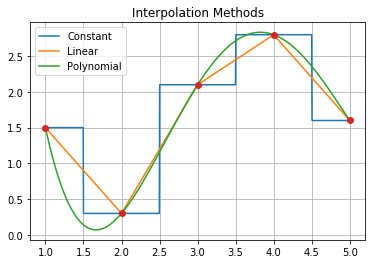

In [5]:
# Test methods

X = [  1,   2,   3,   4,   5]
Y = [1.5, 0.3, 2.1, 2.8, 1.6]

X_plt = linspace(X[0], X[-1], 1000)

Y_constant = np.zeros(len(X_plt))
for i in range(len(X_plt)):
    Y_constant[i] = constant(X, Y, X_plt[i])
    
Y_linear = np.zeros(len(X_plt))
for i in range(len(X_plt)):
    Y_linear[i] = linear(X, Y, X_plt[i])

Y_polynomial = np.zeros(len(X_plt))
A = polynomial(X, Y)
for i in range(len(X_plt)):
    Y_polynomial[i] = P(A, X_plt[i])

plt.plot(X_plt, Y_constant)
plt.plot(X_plt, Y_linear)
plt.plot(X_plt, Y_polynomial)
plt.grid(True)
plt.title('Interpolation Methods')
plt.legend(['Constant', 'Linear', 'Polynomial'])
plt.plot(X, Y, 'o')